In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ds=pd.read_csv('data/houses_1.csv')

In [3]:
ds.head(5)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,terrace_area,garden,garden_area,land_surface,facade_count,swimming_pool,building_condition
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,10.0,0,NaN,321.0,2.0,0,TO_BE_DONE_UP
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,NaN,0,NaN,570.0,4.0,0,NaN
2,8760,HOUSE,HOUSE,145000.0,6,NaN,0,0,0,0,NaN,1,NaN,233.0,NaN,0,TO_RENOVATE
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,NaN,1,300.0,470.0,3.0,0,TO_BE_DONE_UP
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,NaN,1,1300.0,1500.0,4.0,0,NaN


In [4]:
postalcode = pd.read_csv('data/postalcode.csv', encoding='latin1')
postalcode.sort_values(by=['postalCode', 'Sous_Commune'], inplace=True)
 # Keeping only first row (corresponding to the principal municipality when postalCode ends with 0)
# for rows having same postalCode
postalcode.drop_duplicates(['postalCode'], keep='first', inplace=True, ignore_index=True)
# postalcode.info()

postalcode.rename(columns={"postalCode": "location"}, inplace=True)
ds = pd.merge(ds, postalcode, how='left', on="location")

In [5]:
ds.head(5)

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,garden_area,land_surface,facade_count,swimming_pool,building_condition,Commune,Sous_Commune,Commune_Principale,Province,Region
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,NaN,321.0,2.0,0,TO_BE_DONE_UP,Libramont-Chevigny,Non,LIBRAMONT-CHEVIGNY,LUXEMBOURG,WALLONIE
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,NaN,570.0,4.0,0,NaN,Ath,Non,ATH,HAINAUT,WALLONIE
2,8760,HOUSE,HOUSE,145000.0,6,NaN,0,0,0,0,...,NaN,233.0,NaN,0,TO_RENOVATE,Meulebeke,Non,MEULEBEKE,FLANDRE-OCCIDENTALE,VLAANDEREN
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,300.0,470.0,3.0,0,TO_BE_DONE_UP,Roux,Oui,CHARLEROI,HAINAUT,WALLONIE
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,1300.0,1500.0,4.0,0,NaN,Stavelot,Non,STAVELOT,LIEGE,WALLONIE


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18250 entries, 0 to 18249
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            18250 non-null  int64  
 1   type                18250 non-null  object 
 2   subtype             18250 non-null  object 
 3   price               18246 non-null  float64
 4   room_number         18250 non-null  int64  
 5   area                16384 non-null  float64
 6   kitchen_equipped    18250 non-null  int64  
 7   furnished           18250 non-null  int64  
 8   fireplace           18250 non-null  int64  
 9   terrace             18250 non-null  int64  
 10  terrace_area        7956 non-null   float64
 11  garden              18250 non-null  int64  
 12  garden_area         3728 non-null   float64
 13  land_surface        9560 non-null   float64
 14  facade_count        12550 non-null  float64
 15  swimming_pool       18250 non-null  int64  
 16  buil

In [7]:
ds=ds.dropna(subset=['price', 'area'])

In [8]:
ds.head()

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,garden_area,land_surface,facade_count,swimming_pool,building_condition,Commune,Sous_Commune,Commune_Principale,Province,Region
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,NaN,321.0,2.0,0,TO_BE_DONE_UP,Libramont-Chevigny,Non,LIBRAMONT-CHEVIGNY,LUXEMBOURG,WALLONIE
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,NaN,570.0,4.0,0,NaN,Ath,Non,ATH,HAINAUT,WALLONIE
3,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,300.0,470.0,3.0,0,TO_BE_DONE_UP,Roux,Oui,CHARLEROI,HAINAUT,WALLONIE
4,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,1300.0,1500.0,4.0,0,NaN,Stavelot,Non,STAVELOT,LIEGE,WALLONIE
5,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,...,NaN,460.0,4.0,0,TO_RENOVATE,Gavere,Non,GAVERE,FLANDRE-ORIENTALE,VLAANDEREN


In [9]:
ds.shape

(16383, 22)

In [10]:
 # Keeping only last row for rows having same city, price, #rooms and area
ds.drop_duplicates(['location','type','subtype','price','room_number','area'], keep='first', inplace=True, ignore_index=True)

In [11]:
ds.shape

(15686, 22)

In [12]:
# price/square meter new feature
ds['priceSqMeter'] = ds.price/ds.area

In [13]:
ds.shape

(15686, 23)

In [14]:
# prices between 80k€ and 2M€
ds = ds[(80000 <= ds.price) & (ds.price <= 2e6)]

In [15]:
ds.shape


(15168, 23)

In [15]:
# no grouped properties
ds = ds[~ds['subtype'].isin(['MIXED_USE_BUILDING', 'APARTMENT_BLOCK'])]

In [16]:
ds.shape

(14539, 23)

In [17]:
# bedrooms <15
ds = ds[ds.room_number < 15]

In [18]:
ds.shape

(14527, 23)

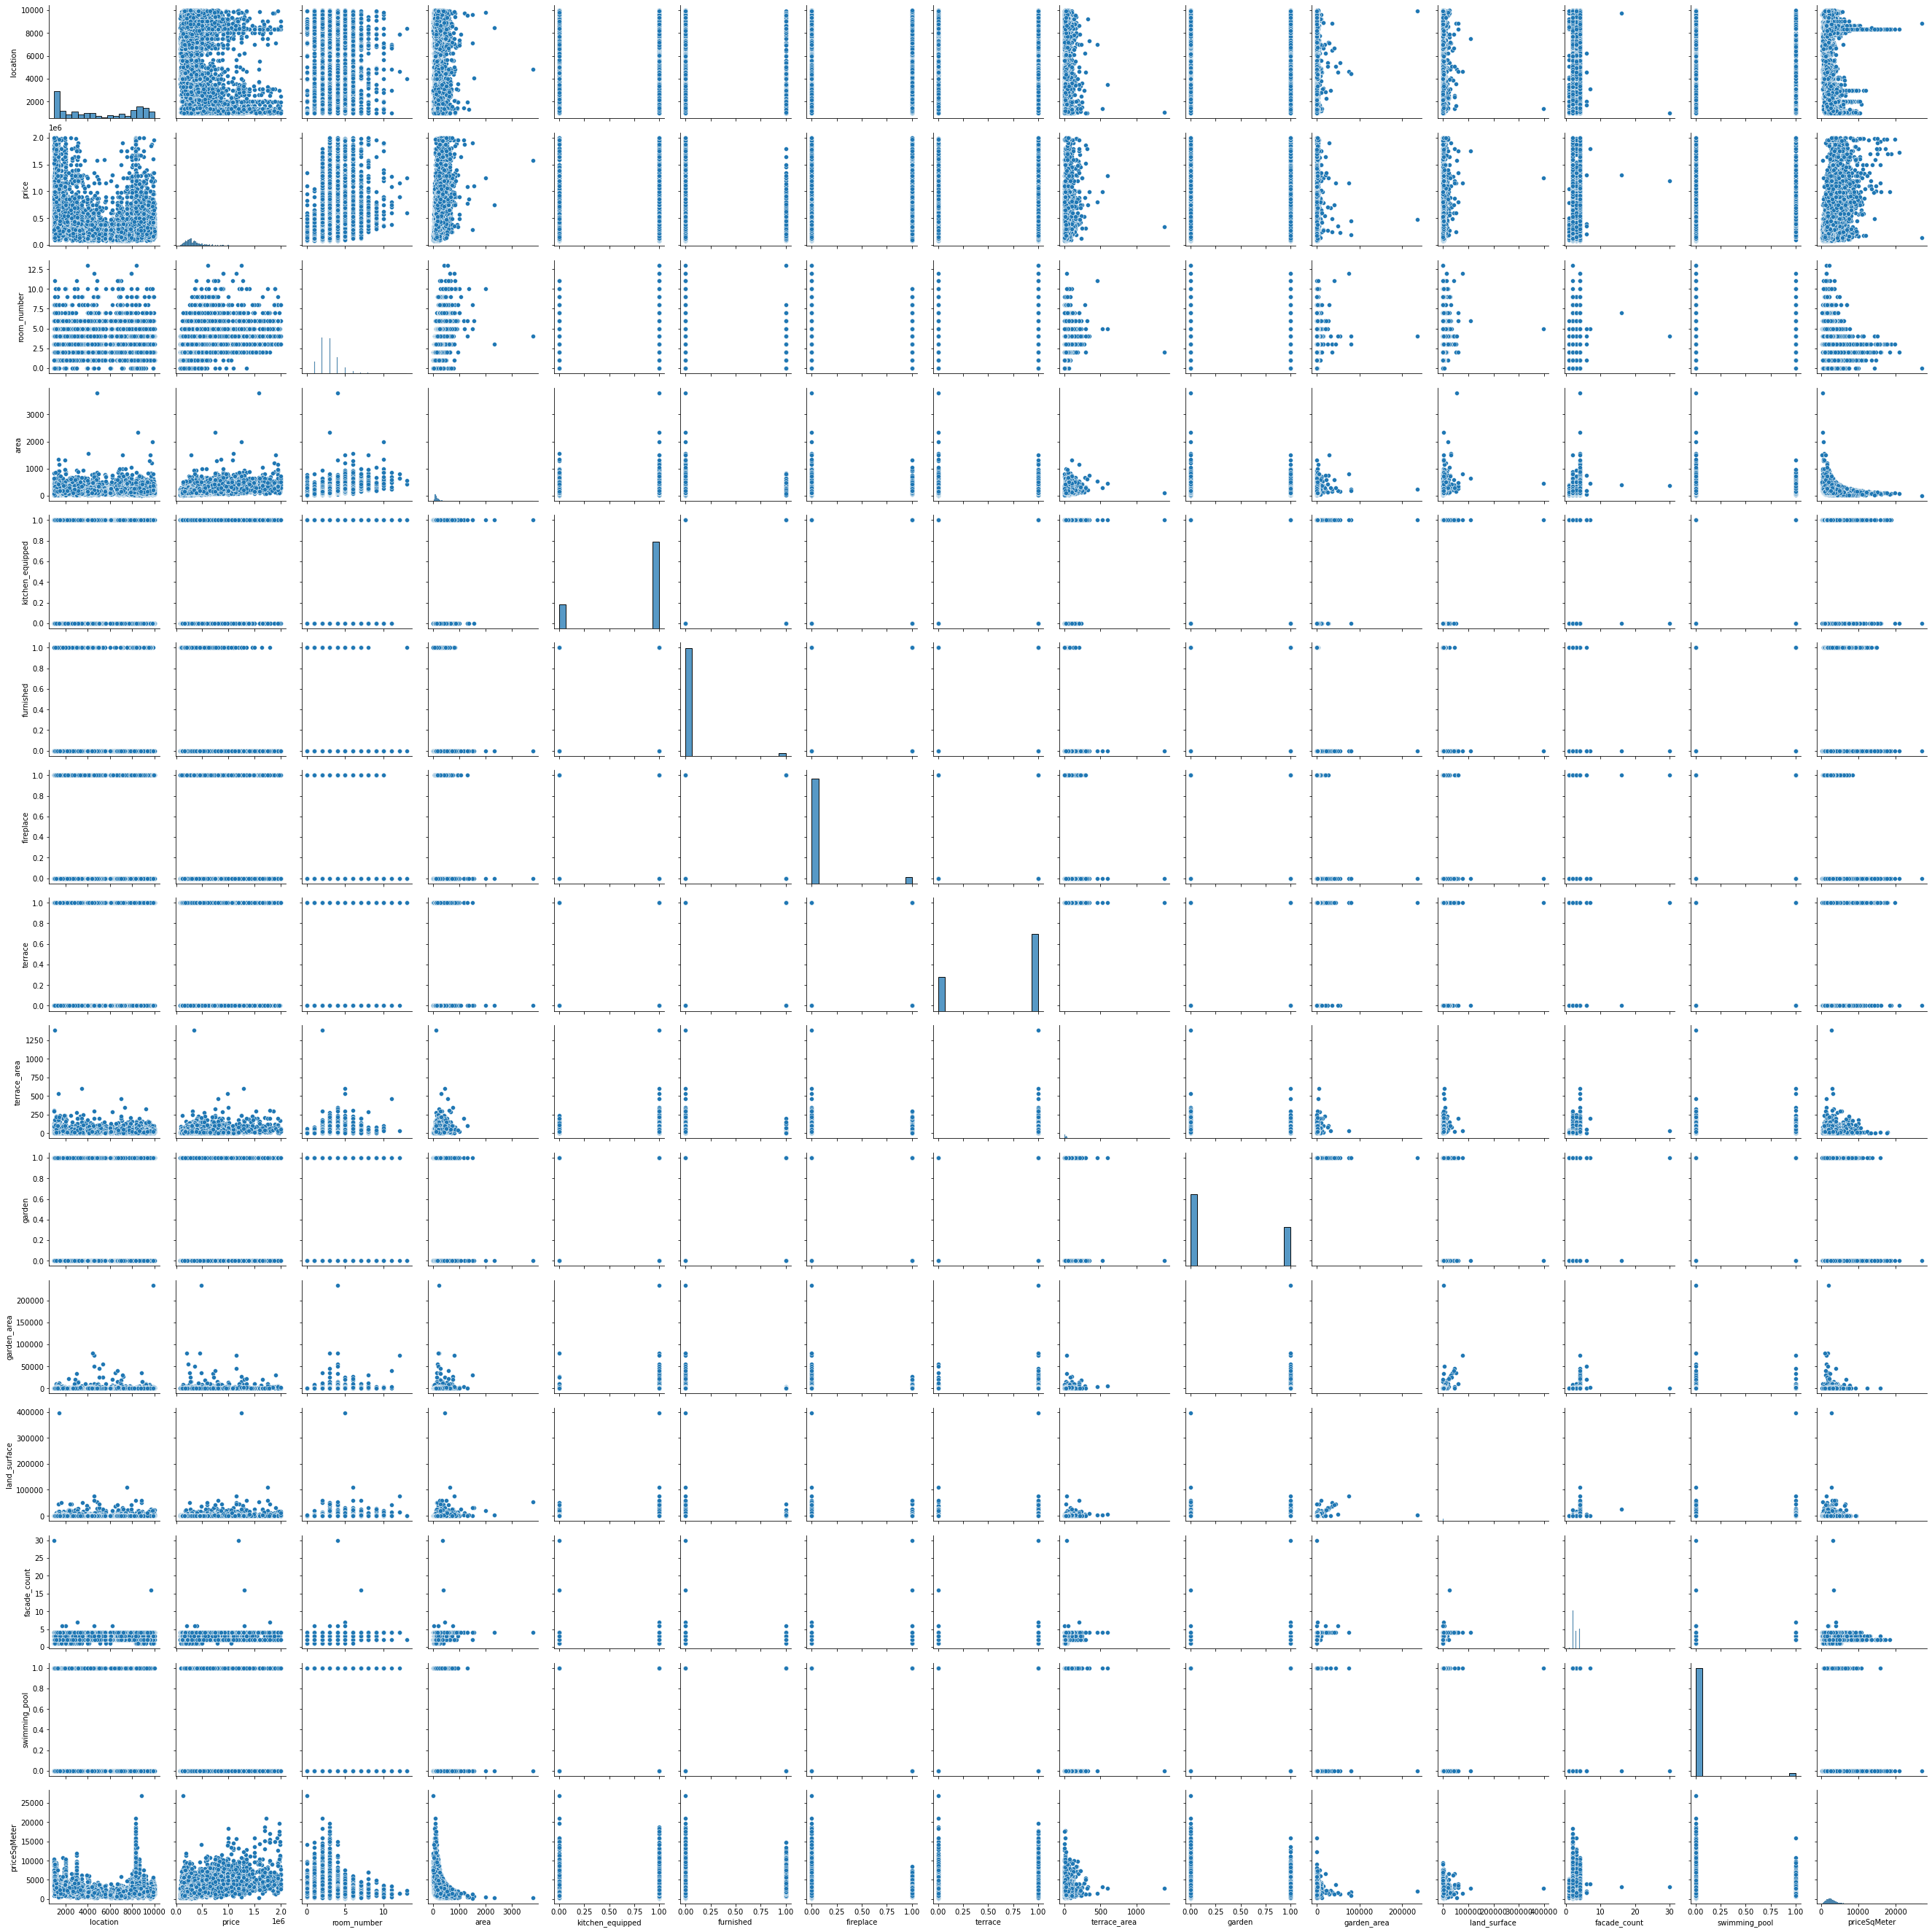

In [19]:
sns.pairplot(ds)

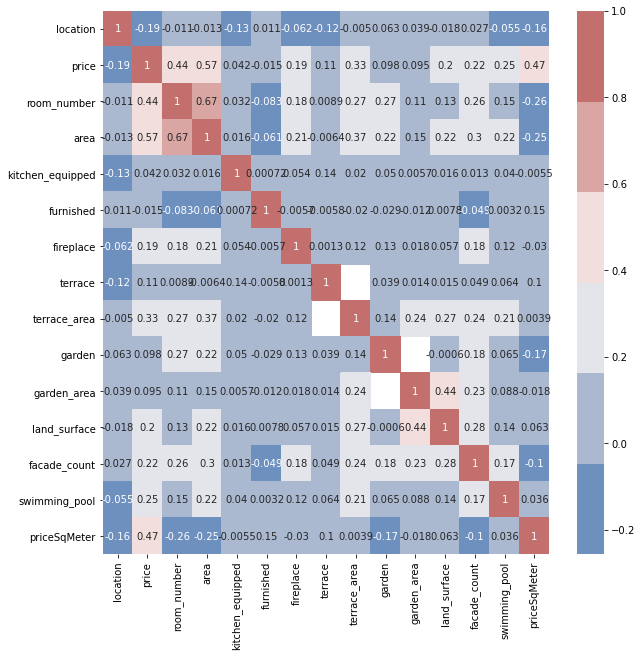

<Figure size 432x288 with 0 Axes>

In [20]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plot=sns.heatmap(ds.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

In [21]:
ds_apartment=ds[ds['type']=='APARTMENT']
ds_apartment

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,land_surface,facade_count,swimming_pool,building_condition,Commune,Sous_Commune,Commune_Principale,Province,Region,priceSqMeter
14,9600,APARTMENT,APARTMENT,165000.0,1,69.0,1,0,0,0,...,NaN,2.0,0,GOOD,Renaix,Non,RENAIX,FLANDRE-ORIENTALE,VLAANDEREN,2391.304348
20,1325,APARTMENT,DUPLEX,265000.0,2,93.0,1,0,0,1,...,NaN,4.0,0,NaN,Chaumont-Gistoux,Non,CHAUMONT-GISTOUX,BRABANT WALLON,WALLONIE,2849.462366
22,9120,APARTMENT,APARTMENT,322500.0,2,106.0,1,0,0,1,...,NaN,NaN,0,NaN,Beveren-Waas,Non,BEVEREN-WAAS,FLANDRE-ORIENTALE,VLAANDEREN,3042.452830
23,9402,APARTMENT,APARTMENT,167990.0,1,60.0,0,0,0,0,...,NaN,NaN,0,NaN,Meerbeke,Oui,NINOVE,FLANDRE-ORIENTALE,VLAANDEREN,2799.833333
24,2000,APARTMENT,APARTMENT,256000.0,1,80.0,1,0,0,0,...,NaN,2.0,0,GOOD,Antwerpen,Non,ANTWERPEN,ANVERS,VLAANDEREN,3200.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15582,3140,APARTMENT,APARTMENT,420000.0,2,103.0,0,0,0,0,...,NaN,NaN,0,NaN,Keerbergen,Non,KEERBERGEN,BRABANT FLAMAND,VLAANDEREN,4077.669903
15606,1000,APARTMENT,APARTMENT,290000.0,1,80.0,1,0,0,0,...,NaN,2.0,0,GOOD,Bruxelles,Non,BRUXELLES,BRUXELLES,BRUXELLES,3625.000000
15608,2000,APARTMENT,APARTMENT,749000.0,2,163.0,1,0,0,1,...,NaN,3.0,0,AS_NEW,Antwerpen,Non,ANTWERPEN,ANVERS,VLAANDEREN,4595.092025
15615,8870,APARTMENT,APARTMENT,189000.0,2,92.0,0,0,0,1,...,NaN,NaN,0,AS_NEW,Izegem,Non,IZEGEM,FLANDRE-OCCIDENTALE,VLAANDEREN,2054.347826


In [22]:
ds_house=ds[ds['type']=='HOUSE']
ds_house

,location,type,subtype,price,room_number,area,kitchen_equipped,furnished,fireplace,terrace,...,land_surface,facade_count,swimming_pool,building_condition,Commune,Sous_Commune,Commune_Principale,Province,Region,priceSqMeter
0,6800,HOUSE,HOUSE,295000.0,5,460.0,1,0,0,1,...,321.0,2.0,0,TO_BE_DONE_UP,Libramont-Chevigny,Non,LIBRAMONT-CHEVIGNY,LUXEMBOURG,WALLONIE,641.304348
1,7800,HOUSE,HOUSE,230000.0,4,128.0,0,0,0,0,...,570.0,4.0,0,NaN,Ath,Non,ATH,HAINAUT,WALLONIE,1796.875000
2,6044,HOUSE,HOUSE,130000.0,2,110.0,1,1,0,1,...,470.0,3.0,0,TO_BE_DONE_UP,Roux,Oui,CHARLEROI,HAINAUT,WALLONIE,1181.818182
3,4970,HOUSE,HOUSE,450000.0,9,400.0,1,0,0,0,...,1500.0,4.0,0,NaN,Stavelot,Non,STAVELOT,LIEGE,WALLONIE,1125.000000
4,9890,HOUSE,MANSION,435000.0,5,452.0,0,0,0,0,...,460.0,4.0,0,TO_RENOVATE,Gavere,Non,GAVERE,FLANDRE-ORIENTALE,VLAANDEREN,962.389381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15681,1600,HOUSE,HOUSE,1115000.0,4,723.0,1,0,0,0,...,820.0,NaN,0,AS_NEW,Sint-Pieters-Leeuw,Non,SINT-PIETERS-LEEUW,BRABANT FLAMAND,VLAANDEREN,1542.185339
15682,2140,HOUSE,HOUSE,435000.0,4,200.0,1,0,0,1,...,248.0,2.0,0,AS_NEW,Borgerhout,Oui,ANTWERPEN,ANVERS,VLAANDEREN,2175.000000
15683,4367,HOUSE,VILLA,375000.0,3,117.0,1,0,0,1,...,1002.0,4.0,0,GOOD,Crisnée,Non,CRISNÉE,LIEGE,WALLONIE,3205.128205
15684,8210,HOUSE,VILLA,435000.0,4,282.0,1,0,1,1,...,989.0,NaN,0,NaN,Zedelgem,Non,ZEDELGEM,FLANDRE-OCCIDENTALE,VLAANDEREN,1542.553191


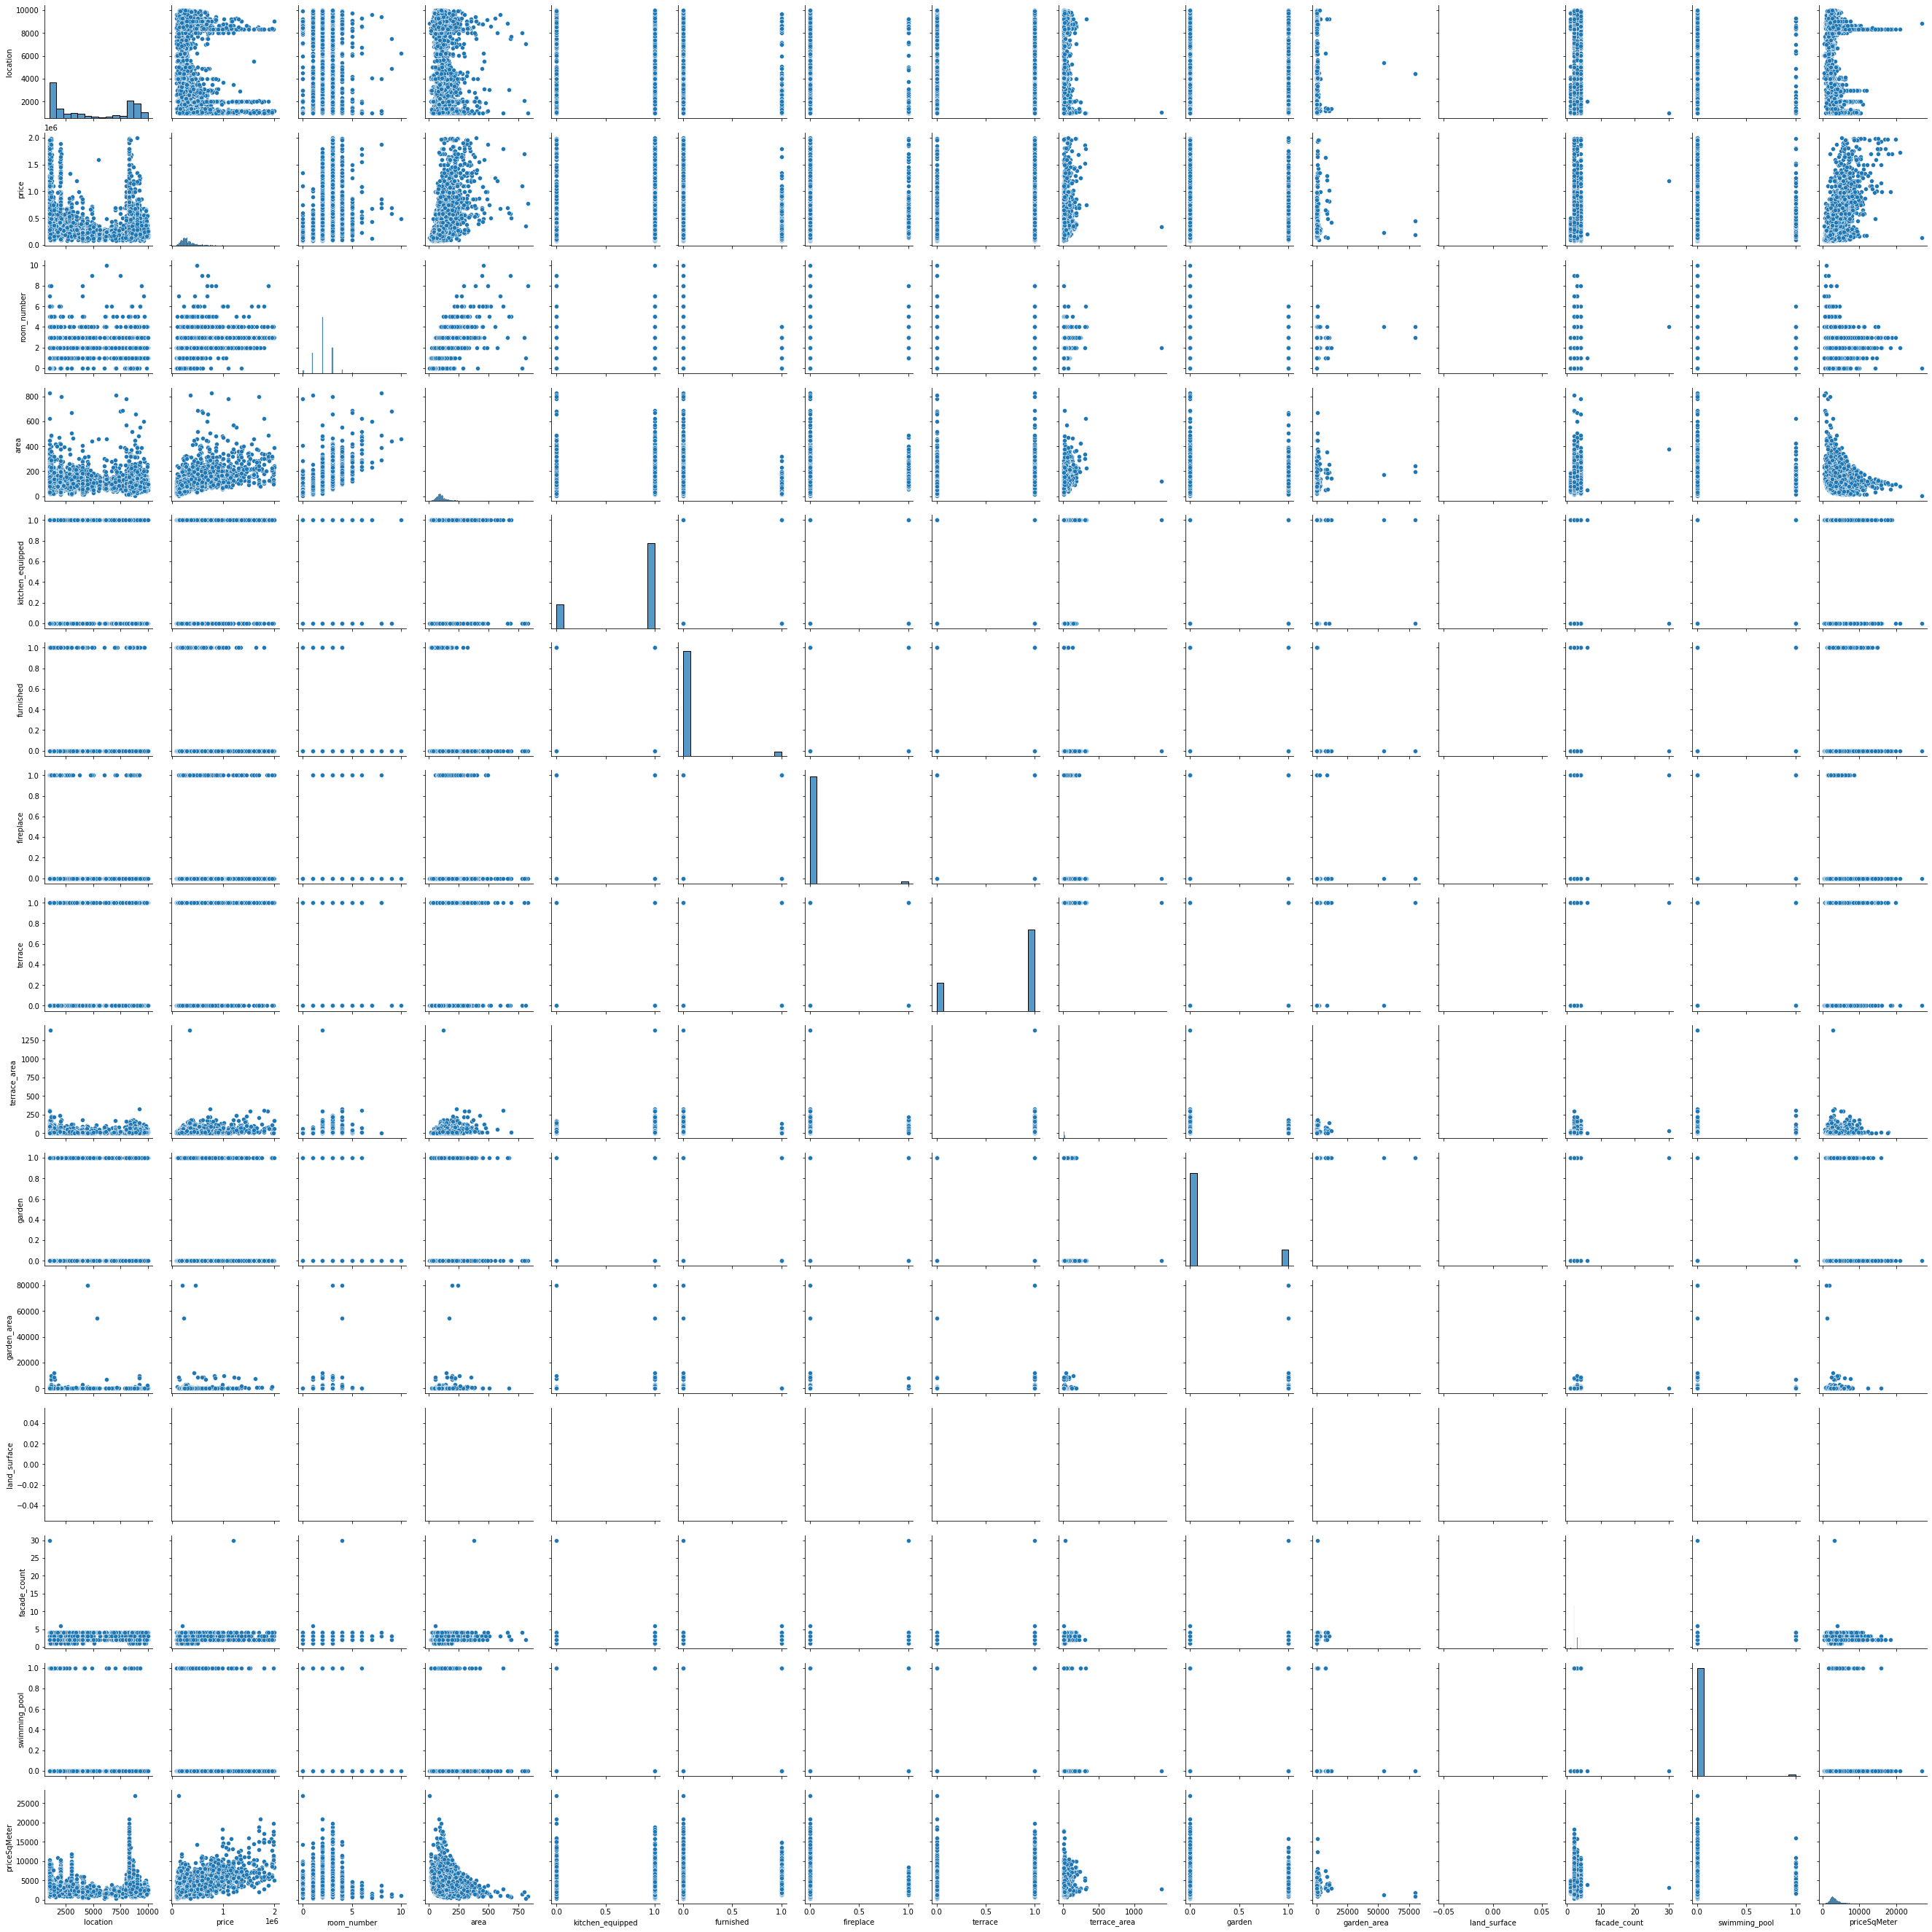

In [23]:
sns.pairplot(ds_apartment)

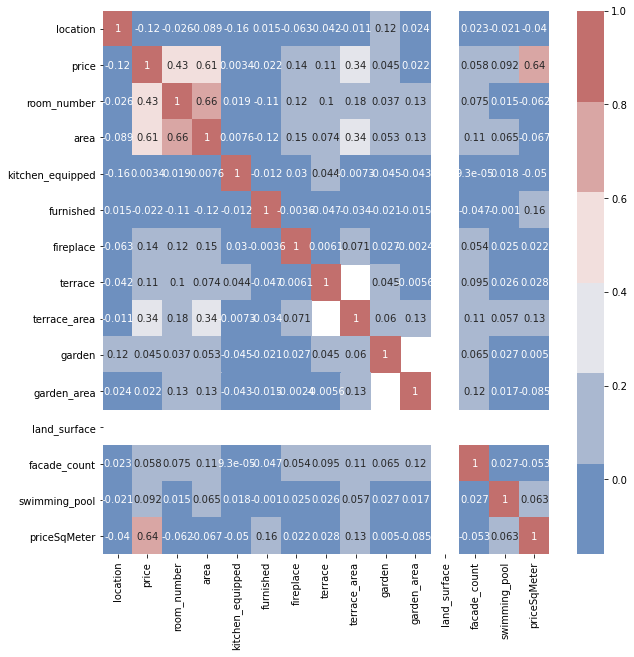

<Figure size 432x288 with 0 Axes>

In [24]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plot=sns.heatmap(ds_apartment.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

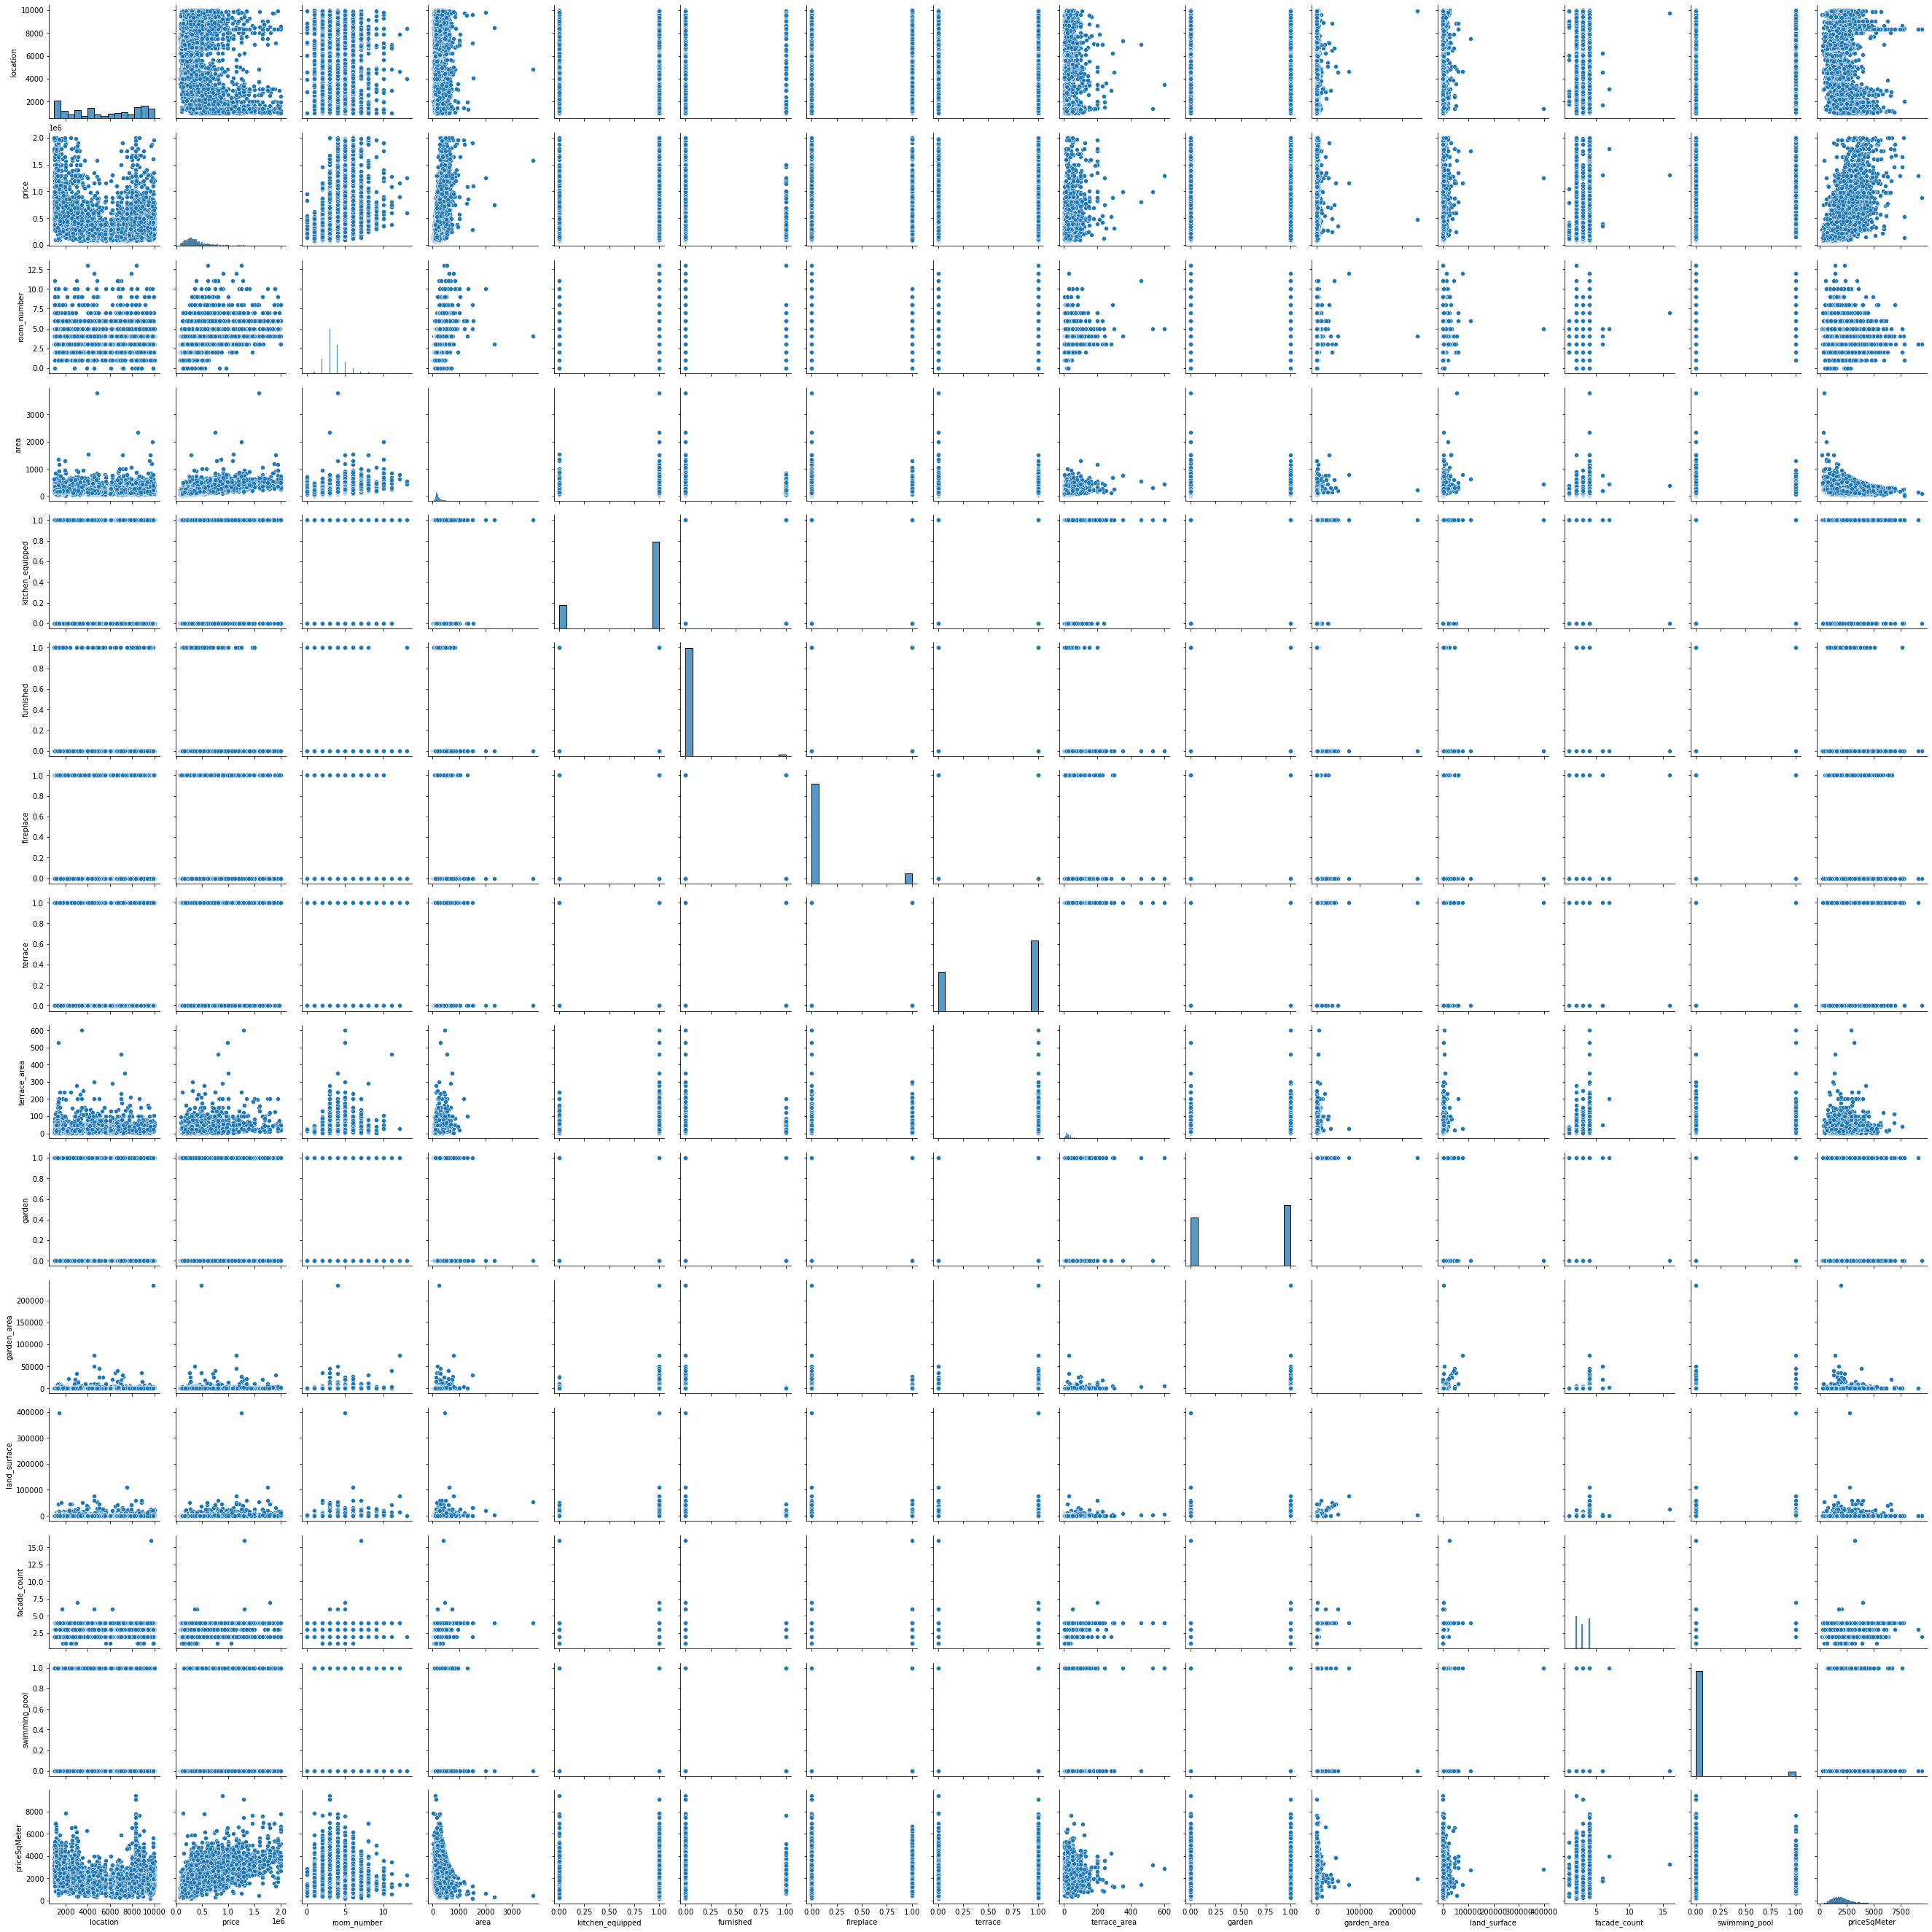

In [25]:
sns.pairplot(ds_house)

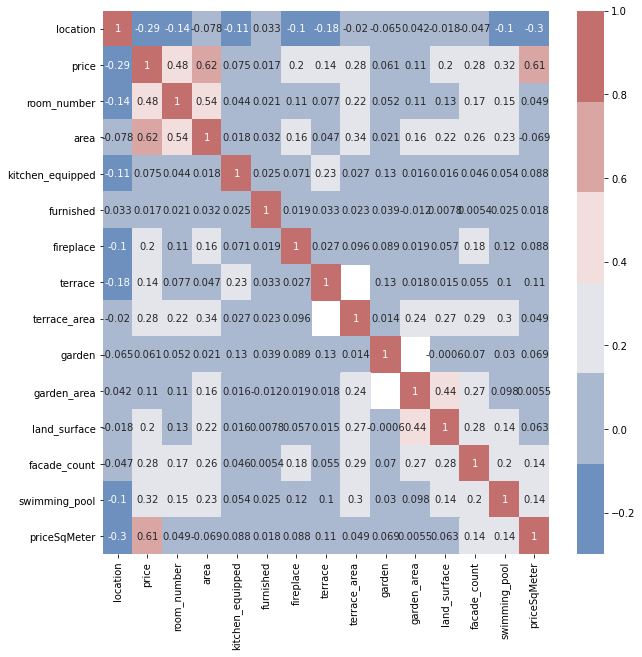

<Figure size 432x288 with 0 Axes>

In [34]:
fig,ax = plt.subplots(figsize=(10, 10)) 
plot=sns.heatmap(ds_house.corr(), cmap=sns.color_palette("vlag"), annot=True)
plt.show()
figure = plot.get_figure()
plt.savefig("heatmap.png", bbox_inches="tight")

C:\Users\atefe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

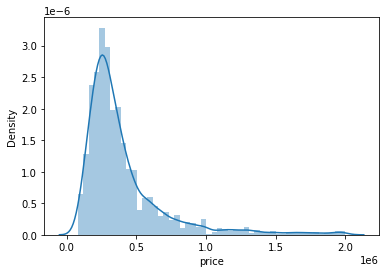

In [35]:
sns.distplot(ds['price'])

C:\Users\atefe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

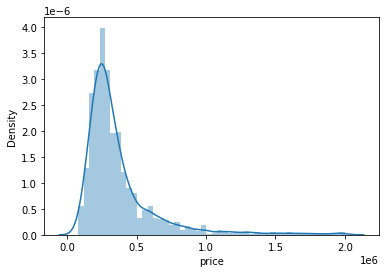

In [36]:
sns.distplot(ds_apartment['price'])

C:\Users\atefe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

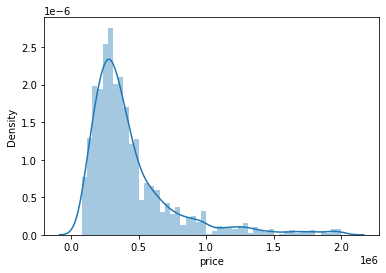

In [37]:
sns.distplot(ds_house['price'])

In [38]:
ds_apartment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7409 entries, 14 to 15622
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            7409 non-null   int64  
 1   type                7409 non-null   object 
 2   subtype             7409 non-null   object 
 3   price               7409 non-null   float64
 4   room_number         7409 non-null   int64  
 5   area                7409 non-null   float64
 6   kitchen_equipped    7409 non-null   int64  
 7   furnished           7409 non-null   int64  
 8   fireplace           7409 non-null   int64  
 9   terrace             7409 non-null   int64  
 10  terrace_area        4333 non-null   float64
 11  garden              7409 non-null   int64  
 12  garden_area         571 non-null    float64
 13  land_surface        0 non-null      float64
 14  facade_count        4312 non-null   float64
 15  swimming_pool       7409 non-null   int64  
 16  buil

In [39]:
ds_apartment[['land_surface']]

,land_surface
14,NaN
20,NaN
22,NaN
23,NaN
24,NaN
...,...
15582,NaN
15606,NaN
15608,NaN
15615,NaN


In [40]:
ds[['land_surface']]

,land_surface
0,321.0
1,570.0
2,470.0
3,1500.0
4,460.0
...,...
15681,820.0
15682,248.0
15683,1002.0
15684,989.0


In [41]:
ds_apartment.columns

Index(['location', 'type', 'subtype', 'price', 'room_number', 'area',
       'kitchen_equipped', 'furnished', 'fireplace', 'terrace', 'terrace_area',
       'garden', 'garden_area', 'land_surface', 'facade_count',
       'swimming_pool', 'building_condition', 'Commune', 'Sous_Commune',
       'Commune_Principale', 'Province', 'Region', 'priceSqMeter'],
      dtype='object')

In [42]:
ds_apartment.isna().sum()

location                 0
type                     0
subtype                  0
price                    0
room_number              0
area                     0
kitchen_equipped         0
furnished                0
fireplace                0
terrace                  0
terrace_area          3076
garden                   0
garden_area           6838
land_surface          7409
facade_count          3097
swimming_pool            0
building_condition    1926
Commune                  0
Sous_Commune             0
Commune_Principale       0
Province                 0
Region                   0
priceSqMeter             0
dtype: int64

### X an y array

In [92]:
X_apartment = ds_apartment[['room_number', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]

y_apartment = ds_apartment['price']
X_house=ds_house[['room_number', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]

y_house= ds_house['price']

### Train test split

In [93]:
from sklearn.model_selection import train_test_split

X_apartment_train, X_apartment_test, y_apartment_train, y_apartment_test = train_test_split(X_apartment, y_apartment, test_size=0.3, random_state=42)
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(X_house, y_house, test_size=0.3, random_state=42)

### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression

reg_ap = LinearRegression(normalize=True)
reg_ap.fit(X_apartment_train,y_apartment_train)

reg_h = LinearRegression(normalize=True)
reg_h.fit(X_house_train,y_house_train)

LinearRegression(normalize=True)

In [95]:
y_pred_ap = reg_ap.predict(X_apartment_test)
y_pred_h = reg_h.predict(X_house_test)

In [96]:
#plt.scatter(y_test, y_pred)

In [97]:
#sns.distplot((y_test - y_pred), bins=50)

In [98]:
from sklearn.metrics import r2_score
score_ap=r2_score(y_apartment_test,y_pred_ap)
score_ap

0.6823413776785678

In [99]:
reg_ap.score(X_apartment_test, y_apartment_test)

0.6823413776785678

In [100]:
score_h=r2_score(y_house_test,y_pred_h)
score_h

0.6013670463020908

In [101]:
reg_h.score(X_house_test, y_house_test)

0.6013670463020908

In [105]:


X_apartment1 = ds_apartment[['area', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]
y_apartment = ds_apartment['price']

X_house1=ds_house[['area', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]
y_house= ds_house['price']

In [106]:
X_apartment_train1, X_apartment_test1, y_apartment_train1, y_apartment_test1 = train_test_split(X_apartment1, y_apartment, test_size=0.3, random_state=42)
X_house_train1, X_house_test1, y_house_train1, y_house_test1 = train_test_split(X_house1, y_house, test_size=0.3, random_state=42)

In [107]:
reg_ap1 = LinearRegression(normalize=True)
reg_ap1.fit(X_apartment_train1,y_apartment_train1)

reg_h1 = LinearRegression(normalize=True)
reg_h1.fit(X_house_train1,y_house_train1)

LinearRegression(normalize=True)

In [108]:
y_pred_ap1 = reg_ap1.predict(X_apartment_test1)
y_pred_h1 = reg_h1.predict(X_house_test1)

In [109]:
reg_ap1.score(X_apartment_test1, y_apartment_test1)

0.8418853993390021

In [110]:
reg_h1.score(X_house_test1, y_house_test1)

0.8519147866646831

In [111]:

X_apartment2 = ds_apartment[['area','room_number' ,'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]
y_apartment = ds_apartment['price']

X_house2=ds_house[['area','room_number', 'kitchen_equipped', 'furnished','fireplace', 'terrace','garden','priceSqMeter']]
y_house= ds_house['price']

In [112]:
X_apartment_train2, X_apartment_test2, y_apartment_train2, y_apartment_test2 = train_test_split(X_apartment2, y_apartment, test_size=0.3, random_state=42)
X_house_train2, X_house_test2, y_house_train2, y_house_test2 = train_test_split(X_house2, y_house, test_size=0.3, random_state=42)

In [113]:
reg_ap2 = LinearRegression(normalize=True)
reg_ap2.fit(X_apartment_train2,y_apartment_train2)

reg_h2 = LinearRegression(normalize=True)
reg_h2.fit(X_house_train2,y_house_train2)

LinearRegression(normalize=True)

In [114]:
y_pred_ap2 = reg_ap2.predict(X_apartment_test2)
y_pred_h2 = reg_h2.predict(X_house_test2)

In [115]:
reg_ap2.score(X_apartment_test2, y_apartment_test2)

0.8420739843229958

In [116]:
reg_h2.score(X_house_test2, y_house_test2)

0.854157886952307